======================================================================================================

# KNN & PCA

======================================================================================================

In [1]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import os
import re
import random
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# import sklearn.grid_search




% matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf-8"))

athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_histograms.csv
complete_data.csv
images
images_athenaeum
images_sizes_2325.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
resized_200
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv



In [6]:
train_data = pd.read_csv("data/train_hist_author_knn.csv")
test_data = pd.read_csv("data/test_hist_author_knn.csv")

print "[INFO] The size of train histogram for KNN" + str(train_data.shape)
print "[INFO] The size of test histogram for KNN" + str(test_data.shape)


[INFO] The size of train histogram for KNN(49890, 34)
[INFO] The size of test histogram for KNN(12473, 34)


In [7]:
train_data.head(1)

,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px
0,444,11653,141479,107241,3576,1031,1010,3886,568,2650,...,144006,99116,46843,25371,63071,67621,69665,480656,0.188182,0.263858


In [8]:
def get_top_author(data, num_author=3):
    author_index = data.author_id.value_counts().index[:num_author]
    data_new = data.loc[data['author_id'].isin(author_index)]
    
    return data_new

train = get_top_author(train_data, 3)
test = get_top_author(test_data, 3)

print train.author_id.value_counts()
print "[trian above] " + '=' * 50 + "[test below]"
print test.author_id.value_counts()

24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64


In [9]:
train_labels = train.author_id
train = train.drop(['author_id', 'painting_id'], axis=1)

print train_labels.value_counts()


24      1369
1793    1338
368     1335
Name: author_id, dtype: int64


In [10]:
test_labels = test.author_id
test = test.drop(['author_id', 'painting_id'], axis=1)

test_labels.value_counts()

24      342
1793    335
368     334
Name: author_id, dtype: int64

======================================================================================================

# KNN 

======================================================================================================

In [54]:
# random.seed(2017)

# X_trian, X_val, y_train, y_val = train_test_split(train, train_labels, test_size = 0.5, random_state=0)

# print "Length of Validation Set:" + str(len(y_val))
# print "Length of Train Set:" + str(len(y_train))
# print "Ratio: " + str(len(y_val) / float(len(y_train)))

In [55]:
import math

int(math.ceil(math.sqrt(len(train))))


64

In [59]:
## Train the KNN model
print "Training KNN Model..."

# minkowski_distance
k = [5, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 150, 200, 210, 220, 224, 230]
#k = [5, 20]
parameters = {'n_neighbors': k, 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 9]
              }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=6, n_jobs=4)
clf

GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 150, 200, 210, 220, 224, 230], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
clf.fit(train, train_labels)

GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50, 70, 80, 90, 100, 150, 200, 210, 220, 224, 230], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [63]:
from sklearn.metrics import classification_report

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = test_labels, clf.best_estimator_.predict(test)
print(classification_report(y_true, y_pred))
print()


Best parameters set found on development set:
()
{'n_neighbors': 15, 'algorithm': 'auto', 'p': 1}
()
Grid scores on development set:
()
0.645 (+/-0.053) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 1}
0.643 (+/-0.038) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 2}
0.624 (+/-0.040) for {'n_neighbors': 5, 'algorithm': 'auto', 'p': 9}
0.670 (+/-0.035) for {'n_neighbors': 10, 'algorithm': 'auto', 'p': 1}
0.664 (+/-0.037) for {'n_neighbors': 10, 'algorithm': 'auto', 'p': 2}
0.648 (+/-0.038) for {'n_neighbors': 10, 'algorithm': 'auto', 'p': 9}
0.674 (+/-0.044) for {'n_neighbors': 15, 'algorithm': 'auto', 'p': 1}
0.663 (+/-0.018) for {'n_neighbors': 15, 'algorithm': 'auto', 'p': 2}
0.650 (+/-0.023) for {'n_neighbors': 15, 'algorithm': 'auto', 'p': 9}
0.673 (+/-0.037) for {'n_neighbors': 20, 'algorithm': 'auto', 'p': 1}
0.671 (+/-0.032) for {'n_neighbors': 20, 'algorithm': 'auto', 'p': 2}
0.654 (+/-0.022) for {'n_neighbors': 20, 'algorithm': 'auto', 'p': 9}
0.661 (+/-0.043) for {'n_ne

In [64]:
y_pred

array([  24, 1793, 1793, ..., 1793,   24,   24])

In [65]:

results = pd.DataFrame()

results.insert(0,'actual',test_labels)
results.insert(1,'predictions',y_pred)

misclassified = (results['actual'] != results['predictions']).mean()
misclassified

0.31651829871414439

In [16]:
## Give me the 5 nearest neighbors of the first two items in the validation set
pd.concat((test_labels.iloc[:5].reset_index(drop = True), 
           pd.DataFrame(clf.kneighbors(test[0:5], n_neighbors=3, return_distance=False)).
        applymap(lambda x: fn_train.iloc[x])), axis = 1)

152

In [68]:
# accuracy for the test set
print "Accuracy of the Model:" + str(clf.score(test,test_labels))

# accuracy for the train set
print "Accuracy of the Model on training set:" + str(clf.score(train,train_labels))


Accuracy of the Model:0.683481701286
Accuracy of the Model on training set:0.718951014349


In [69]:
def result_table(y_true, y_pred):
    rslt = y_true  == y_pred

    test_data_df = pd.DataFrame()
    test_data_df.insert(0,'actual',y_true)
    test_data_df.insert(1,'predictions',y_pred)
    test_data_df.insert(2,'results',rslt)
    
    return test_data_df

test_data_df = result_table(y_true, y_pred)

In [ ]:
# get neighbors 
prediction_nearest_neighbors = pd.DataFrame(clf.kneighbors(test, n_neighbors=107, return_distance=False))
prediction_nearest_neighbors

In [ ]:
nearest_neighbors = list(model.kneighbors(test_data_img[5], n_neighbors=31, return_distance=False)[0])
NN_images = [y_train.iloc[x] for x in nearest_neighbors]
[ (i,NN_images.count(i)) for i in set(NN_images) ]

======================================================================================================

# PCA

======================================================================================================

In [70]:
## Get 10 principal components
pca = PCA(n_components=15)
pca.fit(train)
pca_transformed = pca.transform(train)

0.97650450836418023

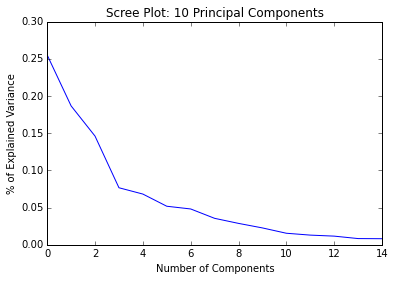

In [71]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(pca.explained_variance_ratio_)

======================================================================================================

# KNN + PCA

======================================================================================================

In [74]:
## Train the KNN model
print "Training KNN Model..."

# minkowski_distance
k = [2, 3, 4, 5, 10, 15, 20]
#k = [5, 20]
parameters = {'n_neighbors': k, 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2, 9]
              }
knn_pca = KNeighborsClassifier()
clf_pca = GridSearchCV(knn_pca, parameters, cv=6, n_jobs=4)
clf_pca

Training KNN Model...


GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [2, 3, 4, 5, 10, 15, 20], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [75]:
clf_pca.fit(pca_transformed, train_labels)

GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'n_neighbors': [2, 3, 4, 5, 10, 15, 20], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:
from sklearn.metrics import classification_report

print("Best parameters set found on development set:")
print()
print(clf_pca.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_pca.cv_results_['mean_test_score']
stds = clf_pca.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_pca.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_pca_true, y_pca_pred = test_labels, clf_pca.best_estimator_.predict(test)
print(classification_report(y_true, y_pred))
print()


Best parameters set found on development set:
()


NameError: name 'clf_pca' is not defined

In [80]:
# accuracy for the test set
print "Accuracy of the Model:" + str(clf.score(test,test_labels))

# accuracy for the train set
print "Accuracy of the Model on training set:" + str(clf.score(train,train_labels))


Accuracy of the Model:0.683481701286
Accuracy of the Model on training set:0.718951014349


In [ ]:
test_data_pca_df = result_table(y_pca_true, y_pca_pred)